In [22]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
from pathlib import Path
from glob import glob
from os import path
%matplotlib inline

# Load Benchmark Results

In [23]:
def load_outputs_files(folder_path):
    output_files = glob(path.join(folder_path, '*.json'))
    outputs, failed = [], []

    for file in output_files:
        try:
            json_res = json.load(open(file))
            json_res['name'] = Path(file).stem
            
            outputs.append(json_res)
        except:
            failed.append(path.basename(file))

    return outputs, failed

automaton_outputs, automaton_failed = load_outputs_files('../outputs-automaton/')
formula_outputs, formula_failed = load_outputs_files('../outputs-formula/')

In [24]:
print(f"Failed Automaton Benchmarks (Total {len(automaton_failed)}): ", automaton_failed)
print(f"Failed Formula Benchmarks (Total {len(formula_failed)}: ", formula_failed)

Failed Automaton Benchmarks (Total 9):  ['10.json', '06.json', '07.json', '11.json', '12.json', '08.json', '09.json', '13.json', '05.json']
Failed Formula Benchmarks (Total 12:  ['10.json', '06.json', '07.json', '11.json', 'KitchenTimerV3.json', '12.json', '08.json', '09.json', '13.json', '05.json', '03.json', 'ltl2dba07.json']


In [25]:
def extract_formula_benchmarks(formula_output):
    total_tested_vars = len(formula_output['tested_variables'])
    total_untested_vars = len(formula_output['output_vars']) - total_tested_vars
    dependent_vars , independent_vars = [], []

    for tested_var in formula_output['tested_variables']:
        if tested_var['is_dependent']:
            dependent_vars.append(tested_var['name'])
        else:
            independent_vars.append(tested_var['name'])

    untested_vars = set(formula_output['output_vars']) - set(dependent_vars) - set(independent_vars)

    return {
        'name': formula_output['name'],
        "is_completed": formula_output['is_completed'],
        "total_duration": formula_output['total_time'],
        
        "is_automaton_built": formula_output['automaton']['is_built'],
        "automaton_build_duration": formula_output['automaton'].get('build_duration', None),
        "automaton_total_states": formula_output['automaton'].get('total_states', None),
        "automaton_state_based": formula_output['automaton'].get('state_based_status', None),
        
        "dependent_vars": dependent_vars,
        "independent_vars": independent_vars,
        "untested_vars": list(untested_vars),
        
        "total_dependent_vars": len(dependent_vars),
        "total_tested_vars": total_tested_vars,
        "total_untested_vars": total_untested_vars,
        
        "output_vars": formula_output['output_vars'],
        "input_vars": formula_output['input_vars'],
        "formula": formula_output['formula'],
    }

formulas_df = pd.DataFrame([
    extract_formula_benchmarks(formula)
    for formula in formula_outputs
])
formulas_df.set_index("name")
formulas_df.head()

,name,is_completed,total_duration,is_automaton_built,automaton_build_duration,automaton_total_states,automaton_state_based,dependent_vars,independent_vars,untested_vars,total_dependent_vars,total_tested_vars,total_untested_vars,output_vars,input_vars,formula
0,ltl2dpa20,False,2399989,True,34.0,14.0,true,[p0],[],[p1],1,1,1,"[p1, p0]","[c, b, a]",G((p0 & !p1) | (!p0 & p1)) & ((FG!p0 & (FG!a |...
1,TwoCountersInRangeA2,False,2399993,True,8030.0,6.0,true,[u0first2counter0first2counter],[],"[u0first2counter0f1ddecrement0first2counter1b,...",1,1,7,"[u0selected0f1dtoggle0selected1b, u0selected0s...","[p0p0second0selected, p0p0in2range0f1dincremen...",(!p0p0in2range0first2counter | !p0p0in2range0s...
2,lilydemo24,True,57722,True,21.0,12.0,true,[],"[b2s_ack0, b2s_ack1, b2r_req0, b2r_req1]",[],0,4,0,"[b2r_req1, b2r_req0, b2s_ack1, b2s_ack0]","[r2b_ack1, r2b_ack0, s2b_req1, s2b_req0]",r2b_ack0 | F((!b2r_req0 & Xr2b_ack0) | (b2r_re...
3,OneCounterGuiA9,False,2399991,True,16004.0,9.0,true,[u0button2down0button2down],[],"[u0counter0counter, u0button2up0f1ddisable1b, ...",1,1,8,"[u0counter0f1dinc0counter1b, u0counter0f1ddec0...","[p0p0in2range0f1dinc0f1dinc0counter1b1b, p0p0i...",(p0p0button2pressed0down | p0p0button2pressed0...
4,ltl2dba24,True,20,True,10.0,4.0,true,[],[acc],[],0,1,0,[acc],[p],(Fp & GFacc) | (G!p & FG!acc)


In [26]:
def extract_automaton_benchmarks(automaton_output):
    return {
        **extract_formula_benchmarks(automaton_output),
        "total_pair_states": automaton_output['algorithm'].get('total_pair_state', None),
        "search_pair_state_duration": automaton_output['algorithm'].get('search_pair_state_duration', None),
        "pruned_state_based_status": automaton_output['algorithm'].get('pruned_state_based_status', None),
    }

automaton_df = pd.DataFrame([
    extract_automaton_benchmarks(automaton)
    for automaton in automaton_outputs
])
automaton_df.set_index("name")
automaton_df.head()

,name,is_completed,total_duration,is_automaton_built,automaton_build_duration,automaton_total_states,automaton_state_based,dependent_vars,independent_vars,untested_vars,total_dependent_vars,total_tested_vars,total_untested_vars,output_vars,input_vars,formula,total_pair_states,search_pair_state_duration,pruned_state_based_status
0,ltl2dpa20,True,74,True,58.0,14.0,true,"[p0, p1]",[],[],2,2,0,"[p1, p0]","[c, b, a]",G((p0 & !p1) | (!p0 & p1)) & ((FG!p0 & (FG!a |...,27,0.0,true
1,TwoCountersInRangeA2,True,8129,True,8114.0,6.0,true,"[u0first2counter0first2counter, u0first2counte...",[],[],8,8,0,"[u0selected0f1dtoggle0selected1b, u0selected0s...","[p0p0second0selected, p0p0in2range0f1dincremen...",(!p0p0in2range0first2counter | !p0p0in2range0s...,12,0.0,true
2,lilydemo24,True,24,True,23.0,12.0,true,[],"[b2s_ack0, b2s_ack1, b2r_req0, b2r_req1]",[],0,4,0,"[b2r_req1, b2r_req0, b2s_ack1, b2s_ack0]","[r2b_ack1, r2b_ack0, s2b_req1, s2b_req0]",r2b_ack0 | F((!b2r_req0 & Xr2b_ack0) | (b2r_re...,22,0.0,true
3,OneCounterGuiA9,True,15859,True,15819.0,9.0,true,"[u0button2down0button2down, u0button2down0f1dd...",[],[],9,9,0,"[u0counter0f1dinc0counter1b, u0counter0f1ddec0...","[p0p0in2range0f1dinc0f1dinc0counter1b1b, p0p0i...",(p0p0button2pressed0down | p0p0button2pressed0...,15,0.0,true
4,ltl2dba24,True,12,True,12.0,4.0,true,[],[acc],[],0,1,0,[acc],[p],(Fp & GFacc) | (G!p & FG!acc),7,0.0,true


In [27]:
automaton_incompleted = automaton_df[automaton_df['is_completed'] == False]
formulas_incompleted = formulas_df[formulas_df['is_completed'] == False]

automaton_completed = automaton_df[automaton_df['is_completed'] == True]
formulas_completed = formulas_df[formulas_df['is_completed'] == True]

print("Total Automaton Incompleted ", len(automaton_incompleted))
print("Total Formulas Incompleted ", len(formulas_incompleted))
print("Total Common Incompleted", len(set(formulas_incompleted["name"]).intersection(set(automaton_incompleted["name"]))))

Total Automaton Incompleted  16
Total Formulas Incompleted  96
Total Common Incompleted 16


# Dependencies Results

In [28]:
dependent_vars_diffs = pd.merge(
    automaton_df[["name", "dependent_vars", "is_completed", "total_duration"]],
    formulas_df[["name", "dependent_vars", "is_completed", "total_duration"]],
    on='name',
    how='left',
    suffixes=('_automaton', '_formula')
)
dependent_vars_diffs

,name,dependent_vars_automaton,is_completed_automaton,total_duration_automaton,dependent_vars_formula,is_completed_formula,total_duration_formula
0,ltl2dpa20,"[p0, p1]",True,74,[p0],False,2399989.0
1,TwoCountersInRangeA2,"[u0first2counter0first2counter, u0first2counte...",True,8129,[u0first2counter0first2counter],False,2399993.0
2,lilydemo24,[],True,24,[],True,57722.0
3,OneCounterGuiA9,"[u0button2down0button2down, u0button2down0f1dd...",True,15859,[u0button2down0button2down],False,2399991.0
4,ltl2dba24,[],True,12,[],True,20.0
...,...,...,...,...,...,...,...
193,KitchenTimerV8,[],False,2399991,[],False,2399993.0
194,ltl2dba27,[],True,17,[],True,36.0
195,TorcsGearing,"[u0gear0gear, u0gear0f1dshift2by2r2p2m0gear0rp...",True,11,[u0gear0gear],True,42.0
196,ltl2dpa19,"[p0, p1, p2]",True,122,[p0],True,502920.0


In [29]:
def are_dependents_diff(row):
    try:
        return set(row['dependent_vars_automaton']) != set(row['dependent_vars_formula'])
    except:
        return True

dependent_vars_diffs["same_dependents"] = dependent_vars_diffs.apply(lambda x: not are_dependents_diff(x), axis=1)
dependent_vars_diffs.head()

,name,dependent_vars_automaton,is_completed_automaton,total_duration_automaton,dependent_vars_formula,is_completed_formula,total_duration_formula,same_dependents
0,ltl2dpa20,"[p0, p1]",True,74,[p0],False,2399989.0,False
1,TwoCountersInRangeA2,"[u0first2counter0first2counter, u0first2counte...",True,8129,[u0first2counter0first2counter],False,2399993.0,False
2,lilydemo24,[],True,24,[],True,57722.0,True
3,OneCounterGuiA9,"[u0button2down0button2down, u0button2down0f1dd...",True,15859,[u0button2down0button2down],False,2399991.0,False
4,ltl2dba24,[],True,12,[],True,20.0,True


* **Note 1:** If in one algorithm no dependent variable was found, then the same hold in the other.

In [42]:
def has_row_dep_vars(row):
    try:
        return len(row["dependent_vars_formula"]) > 0 or len(row["dependent_vars_automaton"]) > 0
    except:
        return False

dependent_vars_diffs[
    (dependent_vars_diffs["same_dependents"] == False) &
    (dependent_vars_diffs["is_completed_formula"] == True) &
    (dependent_vars_diffs.apply(lambda x: has_row_dep_vars, axis=1))
].head()

,name,dependent_vars_automaton,is_completed_automaton,total_duration_automaton,dependent_vars_formula,is_completed_formula,total_duration_formula,same_dependents
6,Sensor,"[u0part2control0part2control, u0part2control0f...",True,336,[u0part2control0part2control],True,1030369.0,False
16,OneCounterInRange,"[u0counter0counter, u0counter0f1ddec0counter1b...",True,25,[u0counter0counter],True,1484.0,False
17,OneCounterInRangeA3,"[u0counter0counter, u0counter0f1ddec0counter1b...",True,58,[u0counter0counter],True,6268.0,False
21,ltl2dpa16,"[p0, p1]",True,14,[p0],True,10243.0,False
28,UnderapproxDemo2,"[u0y0x, u0y0y]",True,11,[u0y0x],True,32.0,False


* **Note:** In the following box, we can see that if we have a dependent variable, the automaton algorithm determinated all the output variables to be dependent

In [40]:
def are_dependent_same_as_output(row):
    try:
        return set(row['dependent_vars']) == set(row['output_vars'])
    except:
        return False

x = automaton_df.copy()
x["is_dependent_same_as_output"] = x.apply(lambda x: are_dependent_same_as_output(x), axis=1)
x = x[["name","is_completed", "is_dependent_same_as_output", "dependent_vars", "total_dependent_vars", "output_vars"]]
x[(x["total_dependent_vars"] > 0) & (x["is_dependent_same_as_output"] == False)]

,name,is_completed,is_dependent_same_as_output,dependent_vars,total_dependent_vars,output_vars


In [32]:
dependent_vars_diffs[dependent_vars_diffs["same_dependents"] == True].head()

,name,dependent_vars_automaton,is_completed_automaton,total_duration_automaton,dependent_vars_formula,is_completed_formula,total_duration_formula,same_dependents
2,lilydemo24,[],True,24,[],True,57722.0,True
4,ltl2dba24,[],True,12,[],True,20.0,True
5,SensorRegister,"[u0reg2val0reg2data, u0reg2val0reg2val]",True,13,"[u0reg2val0reg2data, u0reg2val0reg2val]",True,18.0,True
7,lilydemo08,[],True,11,[],True,25.0,True
8,ltl2dba08,[],True,45,[],False,2399993.0,True


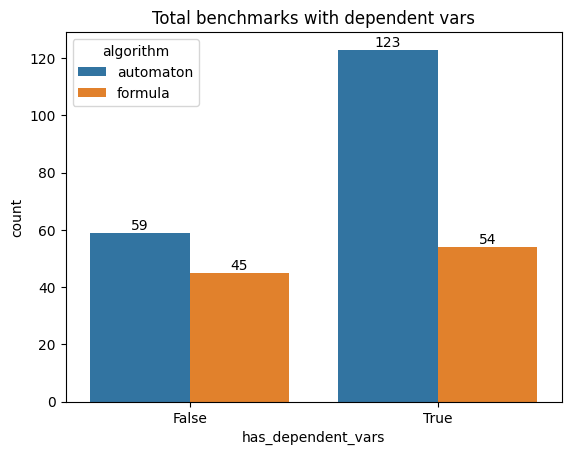

In [33]:
automaton_has_deps = automaton_df[automaton_df["is_completed"] == True][["name", "total_dependent_vars"]].copy()
automaton_has_deps["has_dependent_vars"] = x.apply(lambda x: x["total_dependent_vars"] > 0, axis=1)
automaton_has_deps["algorithm"] = "automaton"

formula_has_deps = formulas_df[formulas_df["is_completed"] == True][["name", "total_dependent_vars"]].copy()
formula_has_deps["has_dependent_vars"] = x.apply(lambda x: x["total_dependent_vars"] > 0, axis=1)
formula_has_deps["algorithm"] = "formula"

ax = sns.countplot(x="has_dependent_vars", data=pd.concat([automaton_has_deps, formula_has_deps]), hue="algorithm")
ax.set_title("Total benchmarks with dependent vars")
for container in ax.containers: ax.bar_label(container)

# Compaing Algorithms Performance

In [34]:
common_fields = ["name","is_completed","total_duration", "dependent_vars", "independent_vars", "untested_vars", "is_automaton_built"]
automaton_benchmarks = automaton_df[common_fields].copy()
automaton_benchmarks["algorithm"] = "automaton"
formula_benchmarks = formulas_df[common_fields].copy()
formula_benchmarks["algorithm"] = "formula"
benchmarks = pd.concat([automaton_benchmarks, formula_benchmarks])
benchmarks

,name,is_completed,total_duration,dependent_vars,independent_vars,untested_vars,is_automaton_built,algorithm
0,ltl2dpa20,True,74,"[p0, p1]",[],[],True,automaton
1,TwoCountersInRangeA2,True,8129,"[u0first2counter0first2counter, u0first2counte...",[],[],True,automaton
2,lilydemo24,True,24,[],"[b2s_ack0, b2s_ack1, b2r_req0, b2r_req1]",[],True,automaton
3,OneCounterGuiA9,True,15859,"[u0button2down0button2down, u0button2down0f1dd...",[],[],True,automaton
4,ltl2dba24,True,12,[],[acc],[],True,automaton
...,...,...,...,...,...,...,...,...
190,KitchenTimerV8,False,2399993,[],[],"[u0beep0p1dbf1b, u0beep0p1dbt1b, u0time0f1dcou...",False,formula
191,ltl2dba27,True,36,[],[acc],[],True,formula
192,TorcsGearing,True,42,[u0gear0gear],"[u0gear0f1dshift2by2r2p2m0gear0rpm1b, u0gear0f...",[],True,formula
193,ltl2dpa19,True,502920,[p0],"[p1, p2]",[],True,formula


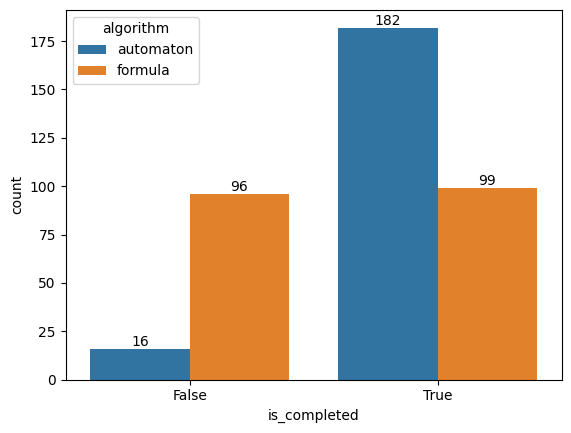

In [35]:
ax = sns.countplot(x="is_completed", data=benchmarks, hue="algorithm");
for container in ax.containers: ax.bar_label(container)

In [36]:
incompleted_with_automaton_built = benchmarks[ (benchmarks["is_completed"] == False) & (benchmarks["is_automaton_built"] == True) ]
print("Number of benchmark where automaton constructed but benchmark not completed: ", len(incompleted_with_automaton_built))
print("Algorithm type: ", incompleted_with_automaton_built["algorithm"].unique())

Number of benchmark where automaton constructed but benchmark not completed:  81
Algorithm type:  ['formula']


<AxesSubplot: xlabel='name', ylabel='deps_calc_duration_ratio'>

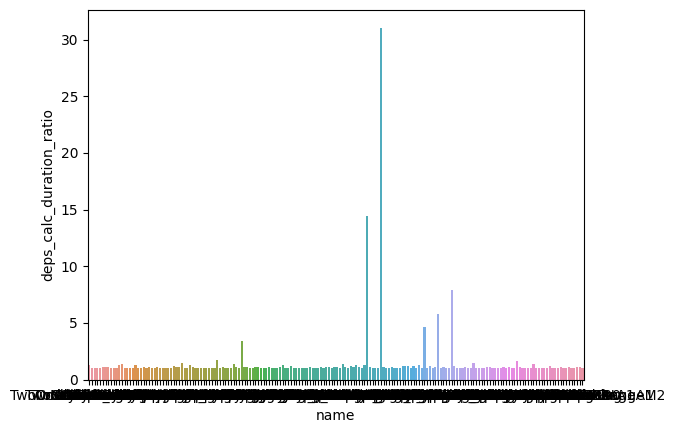

In [37]:
autonmaton_deps_calc_df = automaton_completed.copy();
autonmaton_deps_calc_df["deps_calc_duration_ratio"] = autonmaton_deps_calc_df.apply(lambda x: x["total_duration"] / x["automaton_build_duration"], axis=1)
# autonmaton_deps_calc_df = autonmaton_deps_calc_df[["name", "deps_calc_duration", "total_duration", "automaton_build_duration"]]

sns.barplot(
    data=autonmaton_deps_calc_df,
    x="name",
    y="deps_calc_duration_ratio"
)

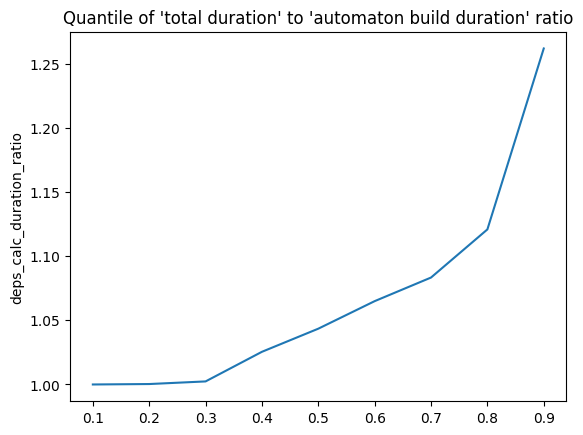

In [38]:
sns.lineplot(
    data=autonmaton_deps_calc_df["deps_calc_duration_ratio"].quantile(np.arange(0.1, 1, 0.1))
).set_title("Quantile of 'total duration' to 'automaton build duration' ratio");